In [8]:
from skimage.transform import resize
from skimage.io import imread, imshow
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
image_np = imread('/Users/sg99018ml/Pictures/mandalorian.jpeg')
image_np

In [7]:
image_np.shape

(1350, 1080, 3)

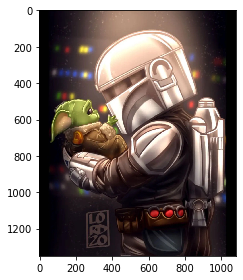

In [9]:
imshow(image_np)

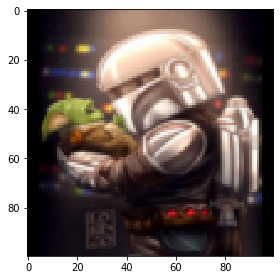

In [16]:
imshow(resize(image_np, (100, 100), mode='edge', anti_aliasing=True))

In [11]:
resize(image_np, (100, 100))

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.00392157]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

In [17]:
from PIL import Image

In [18]:
img = Image.open('/Users/sg99018ml/Pictures/mandalorian.jpeg')

In [26]:
img = Image.fromarray(image_np)

In [ ]:
img

In [29]:
new_image = img.resize((100, 100))

In [34]:
image_np.shape

(1350, 1080, 3)

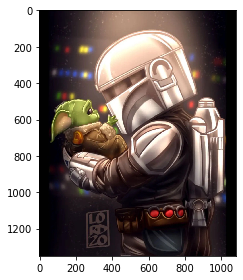

In [36]:
imshow(image_np)

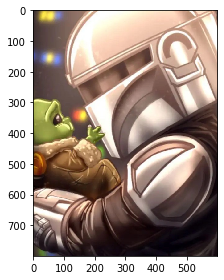

In [37]:
imshow(image_np[200:1000, 200:800])

In [38]:
import tensorflow as tf

In [44]:
image_np2 = tf.image.resize_with_pad(
    image_np, 224, 224
)

/Users/sg99018ml/Workspaces/supermarket_det/.venv/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


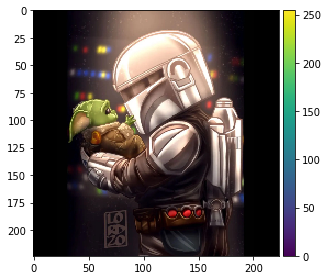

In [55]:
imshow(tf.cast(image_np2, tf.int32).numpy())

In [56]:
from tensorflow.keras.models import load_model 

In [58]:
model = load_model('../workspace/classifier/best1.h5')

In [92]:
book_image_paths=[
    "/Users/sg99018ml/fiftyone/images/001000.jpg",
    "/Users/sg99018ml/fiftyone/images/001014.jpg",
    "/Volumes/GoogleDrive/My Drive/supermarket_detection_workspace/saved_model_for_classifier/classifier for cerealbox&book/test1/1/1.JPG",
    "/Volumes/GoogleDrive/My Drive/supermarket_detection_workspace/saved_model_for_classifier/classifier for cerealbox&book/test1/1/2.JPG",
    "/Volumes/GoogleDrive/My Drive/supermarket_detection_workspace/saved_model_for_classifier/classifier for cerealbox&book/test2/2/1.JPG",
    "/Volumes/GoogleDrive/My Drive/supermarket_detection_workspace/saved_model_for_classifier/classifier for cerealbox&book/test2/2/2.JPG",
]
book_image_nps = [imread(p) for p in book_image_paths]

In [93]:
def plot_images(book_image_nps):
    plt.Figure((10, 10))
    for i, img in enumerate(book_image_nps):
        plt.subplot(2, 3, i+1)
        plt.imshow(img)

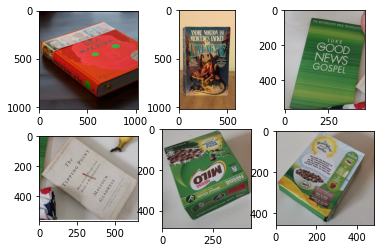

In [94]:
plot_images(book_image_nps)

In [99]:
resize_images = [tf.cast(tf.image.resize(img, (224, 224)), tf.int32).numpy() for img in book_image_nps]

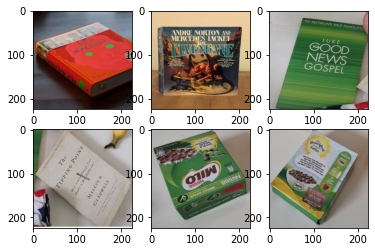

In [105]:
plot_images(resize_images)

In [110]:
%time result = model.predict(tf.convert_to_tensor(resize_images))

CPU times: user 3.73 s, sys: 152 ms, total: 3.88 s
Wall time: 973 ms


In [117]:
result

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [111]:
%time r2 = [model.predict(tf.expand_dims(img, axis=0)) for img in resize_images]

CPU times: user 3.67 s, sys: 257 ms, total: 3.93 s
Wall time: 1.07 s


In [112]:
r2

[array([[1., 0.]], dtype=float32),
 array([[1., 0.]], dtype=float32),
 array([[1., 0.]], dtype=float32),
 array([[1., 0.]], dtype=float32),
 array([[0., 1.]], dtype=float32),
 array([[0., 1.]], dtype=float32)]

In [115]:
index = result.argmax(axis=1)

In [116]:
index

array([0, 0, 0, 0, 1, 1])

array([1., 0.], dtype=float32)

In [120]:
result.max(axis=1)

array([1., 1., 1., 1., 1., 1.], dtype=float32)